- Aulas F085 a F087

___

In [1]:
import pandas as pd

In [2]:
# Importando a base de dados
arquivo_caminho = 'kc_house_data.csv'

dataset = pd.read_csv(arquivo_caminho, sep=',', header=0)

# Transformando a coluna 'date' em um datetime
dataset['date'] = pd.to_datetime(dataset['date'])

# Tabelas Pivot

As tabelas pivot (ou tabelas dinâmicas) são uma forma de reestruturar e resumir dados em um DataFrame, permitindo análises rápidas e agregações personalizadas, em outras palavras, elas são úteis para fazer agrupamento nos dados.


Nesse exemplo abaixo iremos contar a quantidade de imóveis agrupados pelas colunas waterfront e floors;

- No parâmetro **index** informo as colunas que serão usadas para agregação;
- No parâmetro **aggfunc** é usado uma função de agregação, nesse parâmetro é que definimos (no nosso exemplo será a função de count);
- No parâmetro **margins=True**, calculamos a quantidade total no final da tabela.

In [3]:
dataset.pivot_table('id', index=['waterfront', 'floors'], aggfunc='count', margins=True)

id
waterfront floors       
0          1.0     10623
           1.5      1889
           2.0      8166
           2.5       159
           3.0       605
           3.5         8
1          1.0        57
           1.5        21
           2.0        75
           2.5         2
           3.0         8
All                21613

___

# Crosstab ou Tabulação Cruzada

O crosstab em Pandas é uma função que cria uma tabela de contingência — ou seja, uma tabela que mostra a frequência de ocorrência entre duas (ou mais) variáveis categóricas.

É muito usado quando você quer ver como duas variáveis se relacionam em termos de contagem

In [5]:
# Essa funcionalidade cruza valores das variáveis;
# Nesse nosso exemplo podemos ver qual a distribuição dos imóveis por número de quartos com relação a sua condição.

pd.crosstab(dataset['bedrooms'], dataset['condition'])

# Podemos ver que imóveis com 3 quartos estão mais na condição 5

condition,1,2,3,4,5
bedrooms,,,,,
0,1,1,10,1,0
1,4,11,124,48,12
2,12,51,1779,718,200
3,8,69,6308,2711,728
4,4,36,4580,1682,580
5,0,1,1031,418,151
6,1,3,158,87,23
7,0,0,25,9,4
8,0,0,8,3,2


### Plotagem da tabela cruzada

<Axes: title={'center': 'Condition by Bedrooms'}, xlabel='bedrooms'>

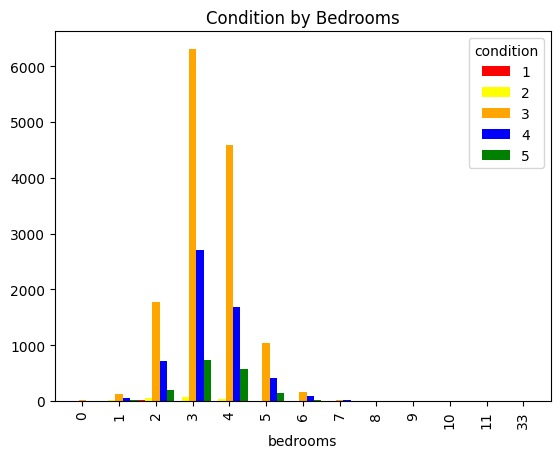

In [7]:
# Usamos o método plot com um gráfico de barras
table = pd.crosstab(dataset['bedrooms'], dataset['condition'])
table.plot(kind='bar', width=1.0, color=['red', 'yellow', 'orange', 'blue', 'green'], title='Condition by Bedrooms', grid=False)

___

# Trabalhando com Excel

Com o pandas, podemos trabalhar com Excel e isso é muito bom, pois, sabemos que temos muita informação nos dias de hoje em planilhas do excel;

Diante disso você pode usar o pandas para manipular planilhas do excel e até mesmo gerar novas planilhas a partir de outros dados.

- Leitura de uma planilha excel:

In [ ]:
df_excel = pd.read_excel('caminho_do_arquivo.xlsx', sheetname=0, header=0)
# sheetname é o nome da planilha dentro do arquivo xlsx;
# header é o indicativo de onde está o nome das colunas (0 é coluna 1 | 1 é coluna 2 | e por ai em diante)

# Caso eu queria especificar qual será o indice basta adicionar o parâmetro index_col=X
# onde X é o número da coluna que eu quero como indice.

___

# Gerar planilhas a partir de DataFrames

Para esse exemplo, iremos utilizar o dataFrame de imóveis que a gente vem trabalhando.

Porém, para não ficar um arquivo muito grande, iremos pegar apenas algumas colunas e transformar em planilha

In [12]:
colunas = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront']

dataset[colunas].head()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront
0,7129300520,221900.0,3,1.00,1180,1.0,0
1,6414100192,538000.0,3,2.25,2570,2.0,0
2,5631500400,180000.0,2,1.00,770,1.0,0
3,2487200875,604000.0,4,3.00,1960,1.0,0
4,1954400510,510000.0,3,2.00,1680,1.0,0


In [13]:
# Escrevendo no disco a planilha sem o valor do indice
dataset[colunas].to_excel('planilha_pandas.xlsx', index=False)